<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항식 문제를 선형회기로 풀어봅니다
![](https://drive.google.com/uc?export=view&id=1X3BKISKrrSOqqAATlwk-n9qzXmXI4-lt)


* 2차 다항식에서 만들어진 데이터 이므로 2차 다항식 문제로 풀어본다
* 4차 다항식 형태로 풀어 본다면?
* Loss 는 MSE와 RMSE를 활용한다. 각 Loss로 했을 때의 문제는?
* Learning Rate를 바꾸어 가면서 실험 해 보세요. 크게 하면?


In [ ]:
# Pytorch로 개발하기 위한 Library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
def show_predicted(x, y, preds, ax=None):
    if ax is None:
      ax=plt.subplots(figsize=(3,3))[1]
    ax.scatter(x,y, label='true')

    if preds is not None:
      ax.scatter(x, preds, label='pred', color='red')
    ax.legend()


## nn.Linear()를 이용하여 위 문제를 해결해 봅시다
* Loss 함수도 :Pytorch 내부에 있는 것을 활용한다.

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


<generator object Module.parameters at 0x7ad69060a420>
Initial Weights: [Parameter containing:
tensor([[0.0858]], requires_grad=True), Parameter containing:
tensor([-0.7139], requires_grad=True)]
Initial Cost: 30020.63671875
Epoch    1/1000,  Cost: 29712.304688
Epoch  101/1000,  Cost: 5711.597168
Epoch  201/1000,  Cost: 5328.270996
Epoch  301/1000,  Cost: 5326.540527
Epoch  401/1000,  Cost: 5324.811523
Epoch  501/1000,  Cost: 5323.084473
Epoch  601/1000,  Cost: 5321.356934
Epoch  701/1000,  Cost: 5319.629395
Epoch  801/1000,  Cost: 5317.903320
Epoch  901/1000,  Cost: 5316.178711
Train accuracy(RMSE) :  5314.45361328125


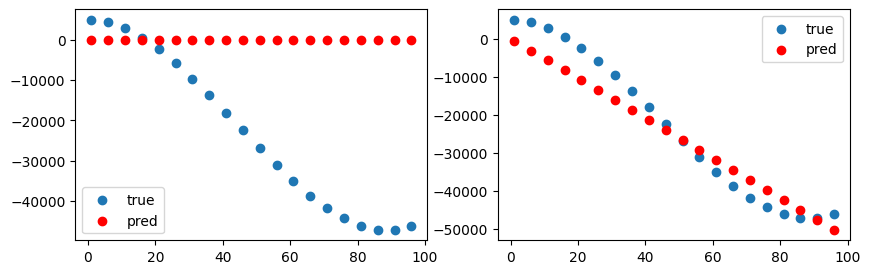

In [ ]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

#######
######## 실습 : 1개의 입력을 받고 1개의 출력을 내는 Linear 모델은 어떻게 선언할까요?
model = nn.Linear(in_features=1, out_features=1, bias=True)
########
print(model.parameters())
##### RMSE Loss를 구현해 본다.
def rmse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()
#####

print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.1)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Multi Layer Perceptron (MLP)로 해당 문제를 해결합니다.

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential

Initial Weights: [Parameter containing:
tensor([[-0.0515],
        [-0.8198],
        [-0.4472],
        [-0.5902],
        [-0.6069]], requires_grad=True), Parameter containing:
tensor([0.5173, 0.4001, 0.7975, 0.4009, 0.4707], requires_grad=True), Parameter containing:
tensor([[-0.2282, -0.2618, -0.2940, -0.2621,  0.1743],
        [-0.1262, -0.1332,  0.3783, -0.2090,  0.3356],
        [-0.1649,  0.1256, -0.1319,  0.0010, -0.1456],
        [-0.0075, -0.1850, -0.3146, -0.0473, -0.3772],
        [-0.4319, -0.2782, -0.1891,  0.0688, -0.0743]], requires_grad=True), Parameter containing:
tensor([-0.0303,  0.1224, -0.4138,  0.3709,  0.3734], requires_grad=True), Parameter containing:
tensor([[ 0.0194,  0.2716, -0.3897, -0.1704,  0.0179]], requires_grad=True), Parameter containing:
tensor([-0.3359], requires_grad=True)]
Initial Cost: 30008.87109375
Epoch    1/1000,  Cost: 30008.539062
Epoch  101/1000,  Cost: 29930.707031
Epoch  201/1000,  Cost: 27818.589844
Epoch  301/1000,  Cost: 5295.489746

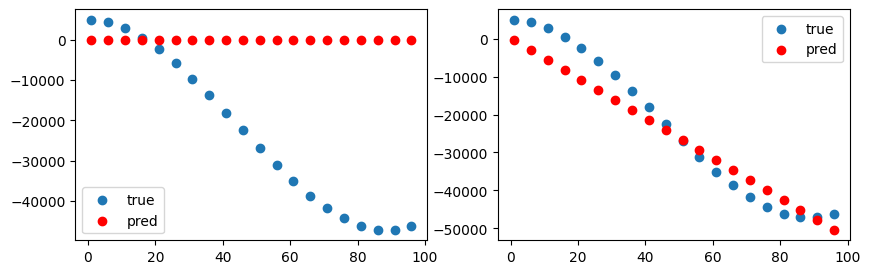

In [ ]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


###############
###### 실습 : inputsize=1, hidden_size=5, outputsize=1 짜리 MLP를 만들어 보세요
model = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                      nn.Linear(in_features=5, out_features=5, bias=True),
                      nn.Linear(in_features=5, out_features=1, bias=True)
                      )
###############


print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % 100 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Neural Network 는 nn.Module을 이용하여 객체로 표현합니다.

* 위에 실습한 내용을 nn.Module을 이용하여 수정해 봅시다

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png" height="300px" width="700px">



Initial Cost: 30023.935546875
Epoch    1/1000,  Cost: 30023.771484
Epoch  101/1000,  Cost: 30009.105469
Epoch  201/1000,  Cost: 29971.687500
Epoch  301/1000,  Cost: 29560.900391
Epoch  401/1000,  Cost: 5347.264648
Epoch  501/1000,  Cost: 5339.805664
Epoch  601/1000,  Cost: 5332.384277
Epoch  701/1000,  Cost: 5324.977051
Epoch  801/1000,  Cost: 5317.564453
Epoch  901/1000,  Cost: 5310.120605
Train accuracy(RMSE) :  5302.6259765625


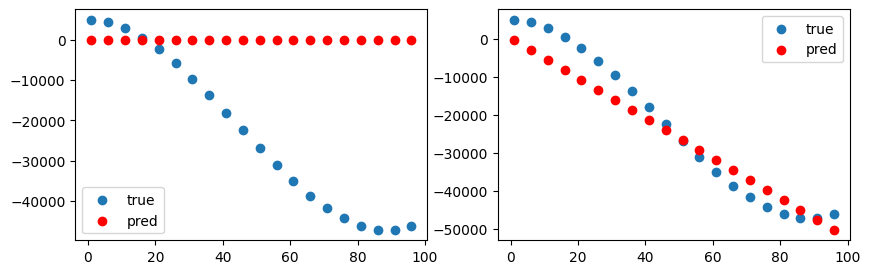

In [ ]:
#### 실습 : nn.Module 을 이용하여 위의 MLP를 구현한다.

import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()

    ####### 실습 : 여기에 모델을 선언한다.
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                                nn.Linear(in_features=5, out_features=5, bias=True),
                                nn.Linear(in_features=5, out_features=1, bias=True)
                  )

  def forward(self, x):
      return self.linear(x)




x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


###############
###### 실습 : LinearRegressionModel 을 이용해 보세요
model = LinearRegressionModel()

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 100번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

## Activation 함수를 이용하여 결과에 비 선형성을 추가합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbQFeQ8%2Fbtrq5pVsbmm%2FNglSr508rNOo0ctBziaN5k%2Fimg.png" height="300px" width="500px">


아래 블로그가 정리가 너무 잘 되어 있음

https://sanghyu.tistory.com/182

Initial Cost: 30607.6484375
Epoch    1/10000,  Cost: 30607.474609
Epoch 1001/10000,  Cost: 5365.464355
Epoch 2001/10000,  Cost: 5332.919922
Epoch 3001/10000,  Cost: 5296.888672
Epoch 4001/10000,  Cost: 5253.847168
Epoch 5001/10000,  Cost: 5197.509277
Epoch 6001/10000,  Cost: 5114.917969
Epoch 7001/10000,  Cost: 4976.593262
Epoch 8001/10000,  Cost: 4716.009277
Epoch 9001/10000,  Cost: 4230.477539


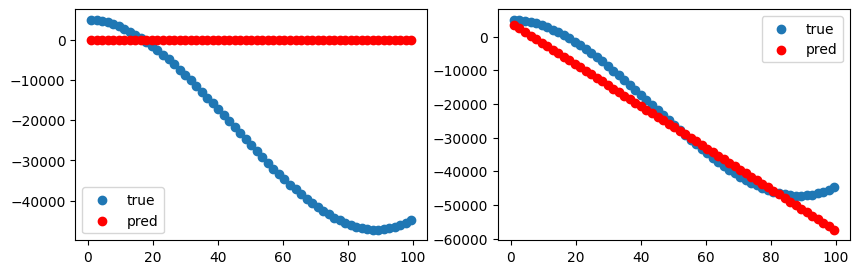

In [ ]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.7).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000


# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()

# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost = rmse(preds,  y_train)

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.00005)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost =  rmse(preds,  y_train)

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % 1000 == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

Initial Cost: 30568.91015625
Epoch    1/10000,  Cost: 30568.769531
Epoch 1001/10000,  Cost: 5321.445312
Epoch 2001/10000,  Cost: 5242.006348
Epoch 3001/10000,  Cost: 5106.776855
Epoch 4001/10000,  Cost: 4757.875000
Epoch 5001/10000,  Cost: 4936.167969
Epoch 6001/10000,  Cost: 4822.942383
Epoch 7001/10000,  Cost: 4728.294434
Epoch 8001/10000,  Cost: 4644.515137
Epoch 9001/10000,  Cost: 4565.206543


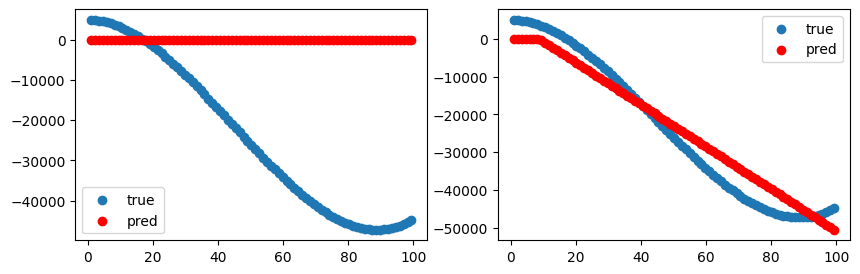

In [ ]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

x_train = torch.arange(1,100,5).float().unsqueeze(1) # start, stop, step
x_train = torch.arange(1,100,1.2).float().unsqueeze(1) # start, stop, step
y_train=0.15*x_train**3 - 20*x_train**2 + 5*x_train - 4 + 5000

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()

    #################
    #### 실습 : 각 linear layer 사이 사이에 Sigmoid, Tanh, ReLU의 activation들을 넣어 보세요.
    self.linear = nn.Sequential(nn.Linear(in_features=1, out_features=5, bias=True),
                                #### 실습 : ReLU? Sigmoid? Tanh?
                                nn.ReLU(),

                                nn.Linear(in_features=5, out_features=5, bias=True),
                                #### 실습 : ReLU? Sigmoid? Tanh?, leakyReLU?
                                nn.ReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)


model = LinearRegressionModel()

# print(f"Initial Weights: {list(model.parameters())}")

preds = model(x_train)

fig, ax = plt.subplots(1,2, figsize=(10,3))
show_predicted(x_train, y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
#optimizer = torch.optim.SGD( model.parameters(), lr=0.000015)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0001)

nb_epochs = 10000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds,  y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
        print('Epoch {:4d}/{},  Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

preds = model(x_train)
show_predicted(x_train, y_train, preds.detach().numpy(),ax[1])

## [참고] 실험할때 마다 항상 똑같은 값을 만들고 싶으면?
* 뉴럴네트워크는 새로 수행될 때마다 Random 값이 생성된다.
* Random Seed 를 고정시키면 항상 똑같은 값이 나오게 된다.

In [ ]:
seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정
np.random.seed(seed) # numpy 관련 연산 무작위 고정

# 당노병 데이터를 이용하여 본격적인 실습을 해 봅시다.
* MLP로 문제를 해결해 본다
* LSTM로 문제를 해결해 본다

In [ ]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(f"feature names: {diabetes.feature_names }")
print(f"data shape: {diabetes.data.shape}")

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
data shape: (442, 10)


In [ ]:
import pandas as pd

df_data = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_data['target'] = diabetes.target # add target
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 데이터 확인
 * 데이터에 NaN이 있는지 확인
 * 인자간 상관관계 확인: 인자산 선형 관계성은 Correlation 을 이용하여 해결함

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ee1e03b44aabd2904cca430279faad515c617891" height="80px" width="400px">


<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Pearson_Correlation_1.jpg" height="300px" width="500px">


참고

https://hyen4110.tistory.com/38
https://wikidocs.net/157461

In [ ]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:

#independent variables / explanatory variables
x = df_data.drop(labels='target', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = df_data['target']


In [ ]:
from sklearn.model_selection import train_test_split

def get_train_testset(X,y, tensor=False, show=True):

  ############## 실습 : train_test_split을 이용하여 데이터를 나눈다.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  ####################################

  if show:
    fig, ax = plt.subplots(1,2, figsize=(5,2))
    ax[0].scatter(X_train, y_train, s=100)
    ax[1].scatter(X_test, y_test, s=100)

  if tensor:
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()
    #X_train = x_train.view(X_train.size(0), -1)
    #y_train = y_train.view(y_train.size(0), -1)

    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test).float()
    #X_test = X_test.view(X_test.size(0), -1)
    #y_test = y_test.view(y_test.size(0), -1)

  return X_train, X_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = get_train_testset(x.values,y.values, tensor=True, show=False)
x_train, x_val, y_train, y_val = get_train_testset(x_train,y_train,  show=False)

#### 실습 : Tensor 의 모양 바꾸기!!
y_train = y_train.view(-1,1)
y_val = y_val.view(-1,1)
y_test = y_test.view(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


torch.Size([282, 10])
torch.Size([89, 10])
torch.Size([282, 1])
torch.Size([89, 1])


In [ ]:
import torch
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):

  # 객체를 만들때에는 항상 init 이 있어야 함
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=10, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=30, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=30, out_features=5, bias=True),
                                nn.LeakyReLU(),
                                nn.Linear(in_features=5, out_features=1, bias=True),
                            )

  def forward(self, x):
      return self.linear(x)


seed = 27
torch.manual_seed(seed) # cpu 연산 무작위 고정
torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
torch.cuda.manual_seed_all(seed) # 멀티 gpu 연산 무작위 고정
np.random.seed(seed) # numpy 관련 연산 무작위 고정

####################
############### 실습 : MLP로 Diabetes 를 예상해 봅시다
###################


Initial Cost: 168.89439392089844
Epoch    1/100000, Cost_train: 168.894104, Cost_val: 175.467377
Epoch 10001/100000, Cost_train: 76.965492, Cost_val: 75.928711
Epoch 20001/100000, Cost_train: 51.935207, Cost_val: 62.012375
Epoch 30001/100000, Cost_train: 51.409580, Cost_val: 62.065022
Epoch 40001/100000, Cost_train: 51.030277, Cost_val: 61.816452
Epoch 50001/100000, Cost_train: 50.777477, Cost_val: 61.674576
Epoch 60001/100000, Cost_train: 50.505062, Cost_val: 61.743526
Epoch 70001/100000, Cost_train: 50.039417, Cost_val: 61.588692
Epoch 80001/100000, Cost_train: 49.496948, Cost_val: 62.104069
Epoch 90001/100000, Cost_train: 48.739361, Cost_val: 62.979572
Train accuracy(RMSE) :  48.260292053222656
Test accuracy(RMSE) : 52.78660583496094


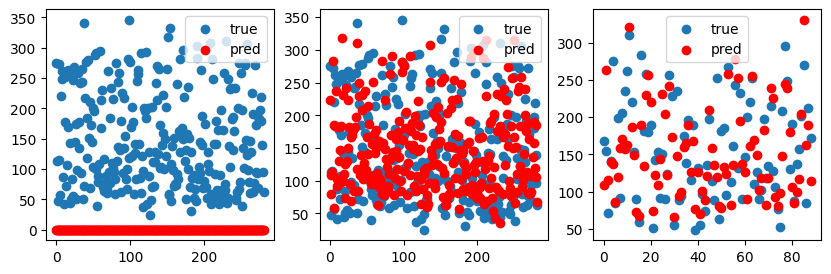

In [ ]:
# 학습해야 하는 모델 선언. hidden layer 크기가 인경우를 구현한다
model = LinearRegressionModel()
preds = model(x_train)

fig, ax = plt.subplots(1,3, figsize=(10,3))
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(), ax[0])

cost =  torch.sqrt(nn.MSELoss()(preds,  y_train))

print(f"Initial Cost: {cost}")

# Weight와 Bias를 cost를 줄이는 방향으로 업데이트 ~ Optimization(최적화)
optimizer = torch.optim.SGD( model.parameters(), lr=0.0003)

nb_epochs = 100000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    preds = model(x_train)
    # cost 계산
    cost = torch.sqrt(nn.MSELoss()(preds, y_train))

    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트


    preds_val = model(x_val)
    # cost 계산
    cost_val = torch.sqrt(nn.MSELoss()(preds_val, y_val))


    # 1000번마다 로그 출력
    if epoch % (nb_epochs/10) == 1:
      print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}, Cost_val: {cost_val.item():.6f}')

preds = model(x_train)
show_predicted(range(x_train.shape[0]), y_train, preds.detach().numpy(),ax[1])
print(f"Train accuracy(RMSE) :  {torch.sqrt(nn.MSELoss()(preds,  y_train))}")

preds_test = model(x_test)
print(f"Test accuracy(RMSE) : { torch.sqrt(nn.MSELoss()(preds_test,  y_test))}")
show_predicted(range(x_test.shape[0]), y_test, preds_test.detach().numpy(),ax[2])